## Naive day-night classification exercise

I use some extractions from AMOS data as dataset. Classifier is based on **Saturation** and **Value** values of image, plain `if`-statement. Goal of this exercise is to get along with image classification pipeline, get more familiar with datasets and get hands-on experience on image processing tasks.

### Step 1. Importing important stuff

In [179]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import os
import cv2

IMAGE_SIZE = (800, 600)

### Step 2. Define some useful functions

Dataset loader function could be easily improved for splited on train/test folders structure if needed

In [182]:
def load_dataset(im_dir):
    img_list = []
    img_type = ['day', 'night']

    for tp in img_type:
        for image_path in glob.glob(os.path.join(im_dir, tp, "*")):
            image = mpimg.imread(image_path)
            image = cv2.resize(image, IMAGE_SIZE)
            binary_type = 0 if tp == "night" else 1
            img_list.append((image, binary_type))

    return img_list

**average_channel** computes average value of all HSV values given image and channel id  

In [183]:
def average_channel(image, channel=2):
    # brightness is default channel
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    brightness = hsv[:,:,channel]
    average = np.sum(brightness) / (IMAGE_SIZE[0]*IMAGE_SIZE[1])
    return average

Basic classifier, my hypothesis is if average brightness of image is greater than 100 and average saturation is less than 90, then with high probability this image is day image.

In [186]:
def classify(image):
    brightness = average_channel(image, 2)
    saturation = average_channel(image, 1)
    # day if average brightness > 100
    if brightness > 100 and saturation < 90:
        return 1
    return 0

Little helper for computing accuracy of prediction in percents

In [187]:
def accuracy(correct, total):
    return round(correct/total*100, 2)

### Step 3. Load dataset and run prediction routine

In [189]:
ds = load_dataset("./day_night_images/")
correct_count = 0
incorrect_list = []
for image, label in ds:
    predicted = classify(image)
    if predicted == label:
        correct_count+=1
    else:
        incorrect_list.append(image)

### Step 4. Compute accuracy of classifier

In [190]:
accuracy(correct_count, len(ds))

96.49

Not so bad :)

And in the end, inspect failed images, maybe it will bring some ideas of improving classifier

### Step 5. Explore failures 

In [192]:
len(incorrect_list)

14

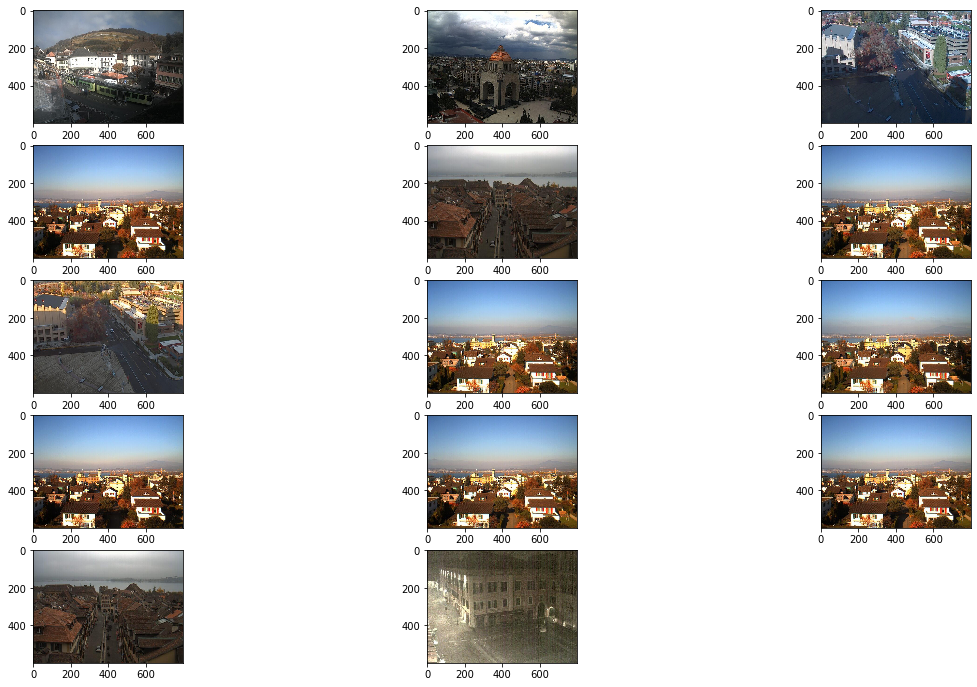

In [193]:
fig=plt.figure(figsize=(20, 12))
columns = 3
rows = 5
for i in range(1, 15):
    fig.add_subplot(rows, columns, i)
    plt.imshow(incorrect_list[i-1])
plt.show()

Unfortunately, dataset contains many repeatiing image, so further improving seems unnecessary. As declared, goal of this exercise is hands-on expierence of image processing routine, not building 100%-correct day/night classifier.